In [2]:
import sys ,os
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

import configparser
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from importlib import reload
import cv2

import utils as Utils
reload(Utils)
config = configparser.ConfigParser()
config.read("../../config.ini")

['../../config.ini']

In [3]:
PROCESSED_DATA_PATH = config["PATHS"]["PROCESSED_DATA_PATH"]
IMAGES_PATH = os.path.join(PROCESSED_DATA_PATH,"segmentation", "rgb_images")
CLASSIFICATION_METADATA_PATH = os.path.join(PROCESSED_DATA_PATH, "classification","classification_metadata.pkl") # Read from dataset after classification

# Load metadata
classification_meta_df = pd.read_pickle(CLASSIFICATION_METADATA_PATH)
print(f"Classification metadata shape: {classification_meta_df.shape}")
classification_meta_df.head()

Classification metadata shape: (443414, 18)


,label,patient_index,scan_index,slice_index,n_slices,ct_slice_path,lung_mask_path,dataset,has_infection,imgpath,height,width,split,split_0,split_1,split_2,split_3,split_4
0,normal,2118,573,79,89,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,CNCB,False,NaN,512,512,train,train,test,train,train,train
1,normal,2118,573,16,89,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,CNCB,False,NaN,512,512,train,train,test,train,train,train
2,normal,2118,573,25,89,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,CNCB,False,NaN,512,512,train,train,test,train,train,train
3,normal,2118,573,42,89,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,CNCB,False,NaN,512,512,train,train,test,train,train,train
4,normal,2118,573,76,89,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...,CNCB,False,NaN,512,512,train,train,test,train,train,train


## Different datasets

In [4]:
print(classification_meta_df.groupby("dataset").size())

dataset
CNCB           397943
COVID_CT_MD     45471
dtype: int64


## Nº Slices Histogram

(array([   93.,  1147.,  1891.,  2133.,  1391.,  1724.,  1773.,  3993.,
         2924.,  4741.,  7086., 12584., 19836., 15508., 16085.,  8694.,
         7686.,  4873.,  5707.,  4922.,  9237.,  6569.,  9435.,  6543.,
         5691.,  5883.,  2885.,  2990.,  2736.,  4926.,  4957.,  6991.,
         5124.,  8158.,  7585., 16811.,  8274.,  8027.,  6724.,  3977.,
         6575.,  5440.,  3920.,  2673.,  2213.,  2960.,  2315.,  5077.,
          555.,  2076.,  2499.,  2546.,  1794.,  5261.,  1854.,  2305.,
         3411.,  1520.,  2424.,   673.,  3416.,  1851.,  1171.,   951.,
         1932.,   733.,  1734.,  1514.,  2048.,  2597.,     0.,  1599.,
         1349.,  1642.,  1940.,  2526.,  2838.,  2297.,  4072.,  2061.,
         4477.,   302.,  2754.,  1854.,   625.,   316.,  1920.,   324.,
          977.,   991.,   334.,   672.,  1362.,  1031.,     0.,   703.,
          354.,   358.,  2174.,   365.,   738.,   373.,   375.,   379.,
          768.,   387.,     0.,   395.,     0.,   801.,     0., 

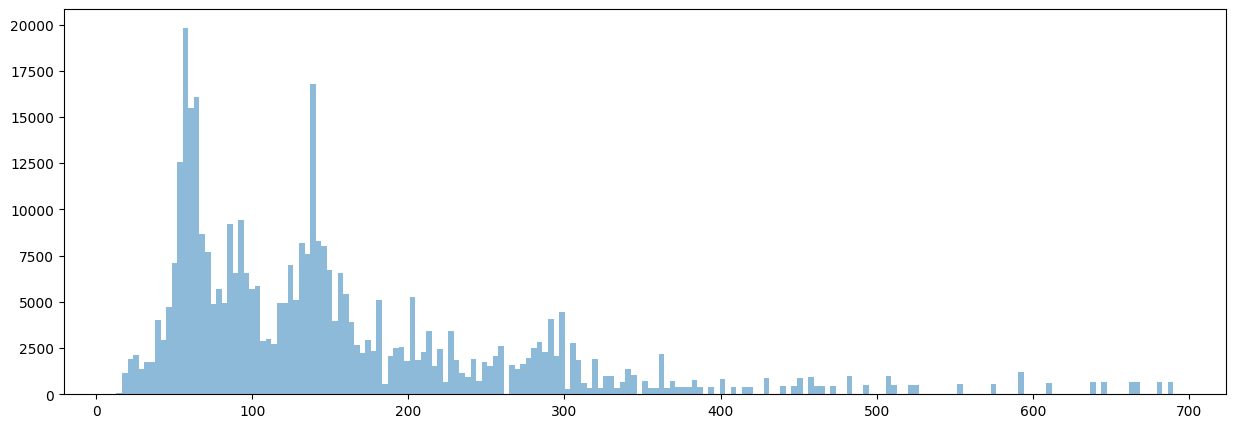

In [12]:
# Plot two histograms for the n_slices per dataset
fig = plt.figure(figsize=(15,5))
plt.hist(classification_meta_df[classification_meta_df["dataset"]=="CNCB"]["n_slices"], bins="auto", alpha=0.5, label="CNCB")


(array([ 108.,    0.,    0.,  112.,    0.,    0.,    0.,    0.,    0.,
         236.,    0.,  362.,  244.,  246.,  248.,  125.,  252.,  127.,
         640.,  258.,  520.,  393.,  930., 1206.,  675., 1088.,  959.,
        1104.,  695.,  840.,  846., 1846., 1144., 2304., 1890., 1029.,
        2368.,  894.,  900., 1208., 1064.,  765.,  616., 1395.,  624.,
        1418., 1590., 1120.,  161.,  972.,  978., 1476.,  495.,  332.,
         668.,  504.,  338., 1023.,  344.,  692.,  174.,    0.,  352.,
         708.,    0.,    0.,    0.,  181.,    0.,  184.,  370.,  558.,
         187.,    0.,    0.,  190.,    0.,    0.,    0.,  195.]),
 array([108.    , 109.0875, 110.175 , 111.2625, 112.35  , 113.4375,
        114.525 , 115.6125, 116.7   , 117.7875, 118.875 , 119.9625,
        121.05  , 122.1375, 123.225 , 124.3125, 125.4   , 126.4875,
        127.575 , 128.6625, 129.75  , 130.8375, 131.925 , 133.0125,
        134.1   , 135.1875, 136.275 , 137.3625, 138.45  , 139.5375,
        140.625 , 141.7125

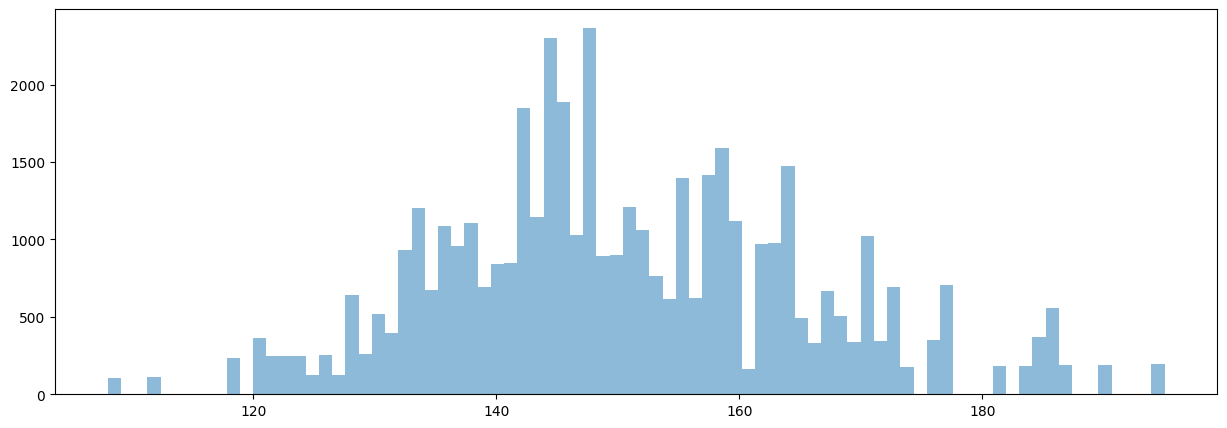

In [11]:
fig = plt.figure(figsize=(15,5))
plt.hist(classification_meta_df[classification_meta_df["dataset"]=="COVID_CT_MD"]["n_slices"], bins="auto", alpha=0.5, label="COVID_CT_MD")